In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np

# Magnetic field study

## Load data

In [2]:
df = pd.read_csv("studies/batch_run_field.csv")
df.head(2)

,RunId,iteration,Step,L,beta,magnetic_field,hot_configuration,algo,activation,seed,energy,magnetization
0,0,0,0,30,0.1,-1,False,heat_bath,simultaneous,69,-862,474
1,0,0,1,30,0.1,-1,False,heat_bath,simultaneous,69,-766,266


## Data processing

In [3]:
df["magnetization_abs"] = np.abs(df["magnetization"])
df["magnetization_abs"] = df["magnetization_abs"]/(30*30) # magnetization per atom
df["energy"] = df["energy"]/(30*30) # energy per atom
df.head(2)

,RunId,iteration,Step,L,beta,magnetic_field,hot_configuration,algo,activation,seed,energy,magnetization,magnetization_abs
0,0,0,0,30,0.1,-1,False,heat_bath,simultaneous,69,-0.957778,474,0.526667
1,0,0,1,30,0.1,-1,False,heat_bath,simultaneous,69,-0.851111,266,0.295556


## Parameter evaluation

In [4]:
# betas in the study - use coolwarm colormap
betas = sorted(set(df.beta.value_counts().index))
normalize = plt.Normalize(min(betas), max(betas))
colormap = plt.cm.coolwarm
colors = colormap(normalize(betas))

In [5]:
# color scale
sm = cm.ScalarMappable(cmap=colormap, norm=normalize)
sm.set_array([])

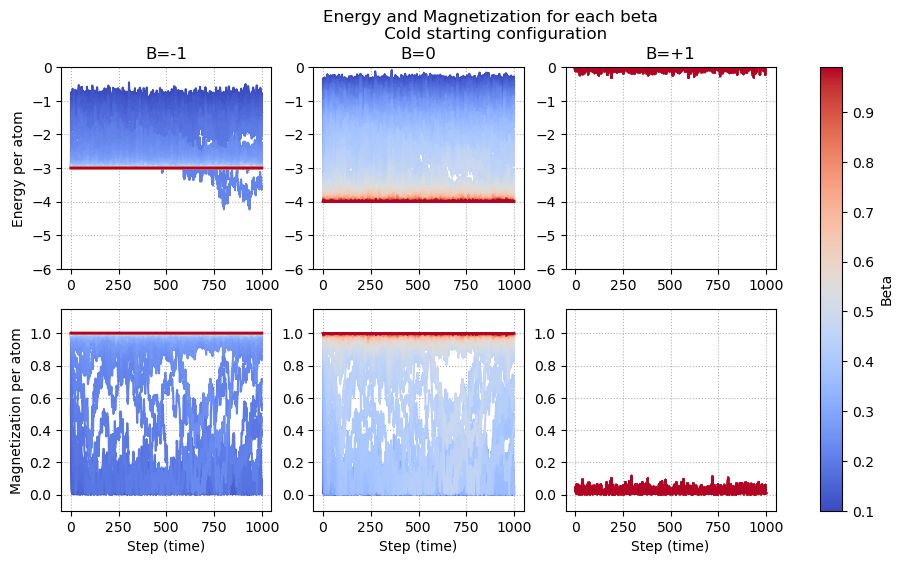

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(1.8*6.4, 1.2*4.8))

for beta, color in zip(betas, colors): # one line per temperature
    
    sm.to_rgba(beta)

    df_plot = df[df["beta"] == beta] 

    # sort accroding to simulation step (time)
    df_plot_0 = df_plot[df_plot["magnetic_field"] == 0]
    df_plot_0 = df_plot_0.sort_values(by="Step", ascending=True)
    
    df_plot_1 = df_plot[df_plot["magnetic_field"] == 1]
    df_plot_1 = df_plot_1.sort_values(by="Step", ascending=True)

    df_plot_m1 = df_plot[df_plot["magnetic_field"] == -1]
    df_plot_m1 = df_plot_m1.sort_values(by="Step", ascending=True)
    
    axs[0][0].plot(df_plot_m1["Step"], df_plot_m1["energy"], label=f'{beta:.2f}', color=color)
    axs[0][1].plot(df_plot_0["Step"], df_plot_0["energy"], label=f'{beta:.2f}', color=color)
    axs[0][2].plot(df_plot_1["Step"], df_plot_1["energy"], label=f'{beta:.2f}', color=color)

    axs[1][0].plot(df_plot_m1["Step"], df_plot_m1["magnetization_abs"], label=f'{beta:.2f}', color=color)
    axs[1][1].plot(df_plot_0["Step"], df_plot_0["magnetization_abs"], label=f'{beta:.2f}', color=color)
    axs[1][2].plot(df_plot_1["Step"], df_plot_1["magnetization_abs"], label=f'{beta:.2f}', color=color)


fig.colorbar(sm, ax=axs.ravel().tolist(), orientation='vertical', label='Beta')

fig.suptitle("Energy and Magnetization for each beta \n Cold starting configuration")

axs[0][0].set_ylabel("Energy per atom")
axs[1][0].set_ylabel("Magnetization per atom")

axs[1][0].set_xlabel("Step (time)")
axs[1][1].set_xlabel("Step (time)")
axs[1][2].set_xlabel("Step (time)")

axs[0][0].grid(ls=':')
axs[0][1].grid(ls=':')
axs[0][2].grid(ls=':')

axs[1][0].grid(ls=':')
axs[1][1].grid(ls=':')
axs[1][2].grid(ls=':')

axs[0][0].set_title(f"B=-1")
axs[0][1].set_title(f"B=0")
axs[0][2].set_title(f"B=+1")

for ax in axs[0]:
    ax.set_ylim(-6, 0.0)

for ax in axs[1]:
    ax.set_ylim(-0.1, 1.15)

plt.show()

# Voting Model

In [7]:
df = pd.read_csv("studies/batch_run_voting.csv")
df.head(2)

,RunId,iteration,Step,L,prob,activation,seed,algo,energy,magnetization
0,0,0,0,30,0.1,simultaneous,69,majority,-2040,-632
1,0,0,1,30,0.1,simultaneous,69,majority,-2224,-698


In [8]:
df["magnetization_abs"] = np.abs(df["magnetization"])
df["magnetization_abs"] = df["magnetization_abs"]/(30*30) # magnetization per atom
df["energy"] = df["energy"]/(30*30) # energy per atom
df.head(2)

,RunId,iteration,Step,L,prob,activation,seed,algo,energy,magnetization,magnetization_abs
0,0,0,0,30,0.1,simultaneous,69,majority,-2.266667,-632,0.702222
1,0,0,1,30,0.1,simultaneous,69,majority,-2.471111,-698,0.775556


In [9]:
# probs in the study - use coolwarm colormap
probs = sorted(set(df.prob.value_counts().index))
normalize = plt.Normalize(min(probs), max(probs))
colormap = plt.cm.coolwarm
colors = colormap(normalize(probs))

In [10]:
# color scale
sm = cm.ScalarMappable(cmap=colormap, norm=normalize)
sm.set_array([])

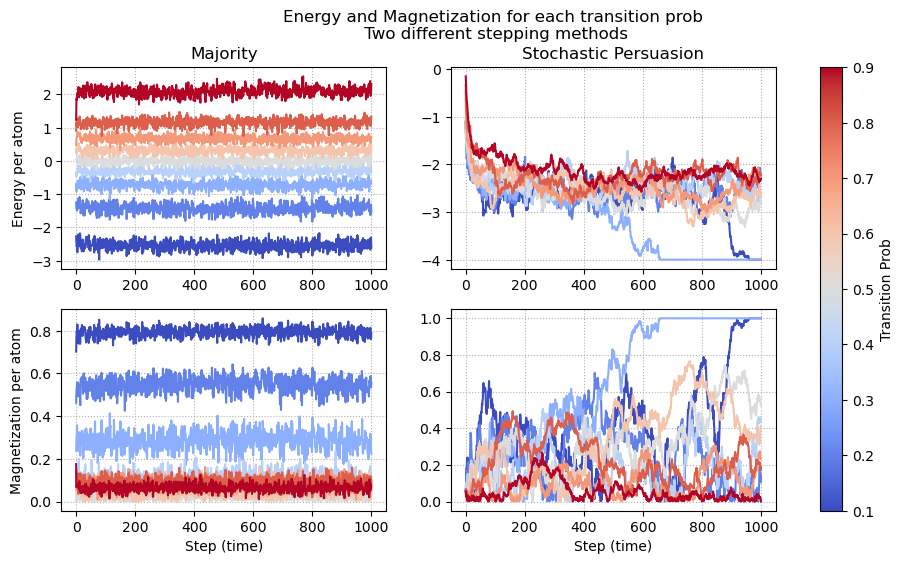

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(1.8*6.4, 1.2*4.8))

for prob, color in zip(probs, colors): # one line per temperature
    
    sm.to_rgba(prob)

    df_plot = df[df["prob"] == prob] 

    df_maj = df_plot[df_plot["algo"] == "majority"]
    df_maj.sort_values(by="Step", ascending=True)

    df_pers = df_plot[df_plot["algo"] == "stochastic_persuasion"]
    df_pers.sort_values(by="Step", ascending=True)


    axs[0][0].plot(df_maj["Step"], df_maj["energy"], label=f'{prob:.2f}', color=color)
    axs[1][0].plot(df_maj["Step"], df_maj["magnetization_abs"], label=f'{prob:.2f}', color=color)

    axs[0][1].plot(df_pers["Step"], df_pers["energy"], label=f'{prob:.2f}', color=color)
    axs[1][1].plot(df_pers["Step"], df_pers["magnetization_abs"], label=f'{prob:.2f}', color=color)

fig.colorbar(sm, ax=axs.ravel().tolist(), orientation='vertical', label='Transition Prob')

fig.suptitle("Energy and Magnetization for each transition prob\n Two different stepping methods")

axs[0][0].set_ylabel("Energy per atom")
axs[1][0].set_ylabel("Magnetization per atom")

# for ax in axs:
axs[1][0].set_xlabel("Step (time)")
axs[1][1].set_xlabel("Step (time)")

for ax in axs.flatten():
    ax.grid(ls=':')

axs[0][0].set_title("Majority")
axs[0][1].set_title("Stochastic Persuasion")
# # same limits with field study
# axs[0][0].set_ylim(-6, 0.0)
# axs[0][1].set_ylim(-6, 0.0)
# axs[0][1].set_ylim(-0.1, 1.15)
# axs[1][1].set_ylim(-0.1, 1.15)

plt.show()